## Comcast Telecom Consumer Complaints Project

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Import data into Python environment.

In [8]:
csv_filename = "Comcast_telecom_complaints_data.csv"
complaints_data = pd.read_csv(csv_filename)

In [9]:
#Check data
print(complaints_data.head())

  Ticket #                                 Customer Complaint      Date  \
0   250635                      Comcast Cable Internet Speeds  22-04-15   
1   223441       Payment disappear - service got disconnected  04-08-15   
2   242732                                  Speed and Service  18-04-15   
3   277946  Comcast Imposed a New Usage Cap of 300GB that ...  05-07-15   
4   307175         Comcast not working and no service to boot  26-05-15   

  Date_month_year         Time        Received Via      City     State  \
0       22-Apr-15   3:53:50 PM  Customer Care Call  Abingdon  Maryland   
1       04-Aug-15  10:22:56 AM            Internet   Acworth   Georgia   
2       18-Apr-15   9:55:47 AM            Internet   Acworth   Georgia   
3       05-Jul-15  11:59:35 AM            Internet   Acworth   Georgia   
4       26-May-15   1:25:26 PM            Internet   Acworth   Georgia   

   Zip code  Status Filing on Behalf of Someone  
0     21009  Closed                          No  
1   

In [4]:
#check the number of rows and columns
complaints_data.shape

(2224, 11)

In [6]:
# get dataframe info and column names
complaints_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [7]:
#Check for Nan values
null_values = complaints_data.isnull().sum().sum() # no null values
null_values

0

In [8]:
na_values = complaints_data.isna().sum().sum() # no null values
na_values

0

In [9]:
# Check for duplicate values
complaints_data.duplicated().sum()

0

## Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [10]:
complaints_data['Date_new'] = pd.to_datetime(complaints_data['Date'], format="%d-%m-%y")

In [11]:
complaints_data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Date_new
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26


In [6]:
complaints_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ticket #                     2224 non-null   object        
 1   Customer Complaint           2224 non-null   object        
 2   Date                         2224 non-null   object        
 3   Date_month_year              2224 non-null   object        
 4   Time                         2224 non-null   object        
 5   Received Via                 2224 non-null   object        
 6   City                         2224 non-null   object        
 7   State                        2224 non-null   object        
 8   Zip code                     2224 non-null   int64         
 9   Status                       2224 non-null   object        
 10  Filing on Behalf of Someone  2224 non-null   object        
 11  date_new                     2224 non-null 

In [12]:
groupby_daily = complaints_data.groupby('Date')
type(groupby_daily)
numofcomplaints_daily = groupby_daily.size()
numofcomplaints_daily

Date
04-01-15    18
04-02-15    27
04-03-15    15
04-04-15    12
04-05-15     6
            ..
29-06-15    51
30-04-15    24
30-05-15     9
30-06-15    53
31-05-15    10
Length: 91, dtype: int64

In [13]:
days = numofcomplaints_daily.index
days

Index(['04-01-15', '04-02-15', '04-03-15', '04-04-15', '04-05-15', '04-06-15',
       '04-07-15', '04-08-15', '04-09-15', '04-10-15', '04-11-15', '04-12-15',
       '05-01-15', '05-02-15', '05-03-15', '05-04-15', '05-05-15', '05-06-15',
       '05-07-15', '05-08-15', '05-09-15', '05-10-15', '05-11-15', '05-12-15',
       '06-01-15', '06-02-15', '06-03-15', '06-04-15', '06-05-15', '06-06-15',
       '06-07-15', '06-08-15', '06-09-15', '06-10-15', '06-11-15', '06-12-15',
       '13-04-15', '13-05-15', '13-06-15', '14-04-15', '14-05-15', '14-06-15',
       '15-04-15', '15-05-15', '15-06-15', '16-04-15', '16-05-15', '16-06-15',
       '17-04-15', '17-05-15', '17-06-15', '18-04-15', '18-05-15', '18-06-15',
       '19-04-15', '19-05-15', '19-06-15', '20-04-15', '20-05-15', '20-06-15',
       '21-04-15', '21-05-15', '21-06-15', '22-04-15', '22-05-15', '22-06-15',
       '23-04-15', '23-05-15', '23-06-15', '24-04-15', '24-05-15', '24-06-15',
       '25-04-15', '25-05-15', '25-06-15', '26-04-15

In [14]:
freq = numofcomplaints_daily.values
freq

array([ 18,  27,  15,  12,   6,  13,  25,  28,  21,  21,   5,  15,  12,
         7,   5,  12,  14,  14,  15,  15,  11,   7,  12,   7,  25,  25,
        25,  12,  29,  11,   9,  24,  23,  25,  21,  43,  24,  12,  32,
        23,  15,  16,  12,  12,  34,  20,  16,  29,  21,   7,  32,   8,
        14,  47,   9,  12,  29,  20,  15,  16,  12,  17,  12,  22,  14,
        30,  23,  12, 190,  24,   7, 218,  16,  12,  98,   8,  27,  55,
        25,  17,  39,  26,  26,  27,  22,  14,  51,  24,   9,  53,  10])

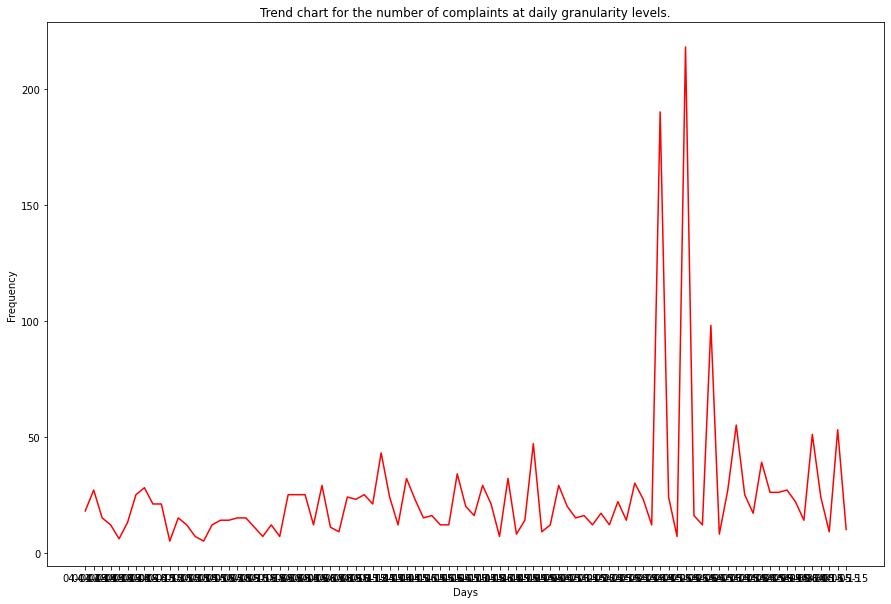

In [17]:
plt.rcParams["figure.figsize"] = [15,10] # increase size
plt.title("Trend chart for the number of complaints at daily granularity levels.")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.plot(days, freq, 'r')

In [18]:
# monthly level trend chart

# create a function to extract the month name from date
def getMonth(date):
    #return date.month_name()
    return date.strftime("%m")

In [20]:
# creating a new column to save the month name
complaints_data['Month'] = complaints_data['Date_new'].apply(getMonth)
complaints_data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Date_new,Month
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22,04
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04,08
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18,04
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05,07
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26,05


In [21]:
# get frequency of complaints for months
month_wise_complaints = complaints_data.groupby('Month').size()
month_wise_complaints

Month
01      55
02      59
03      45
04     375
05     317
06    1046
07      49
08      67
09      55
10      53
11      38
12      65
dtype: int64

In [22]:
months = month_wise_complaints.index
month_freq = month_wise_complaints.values

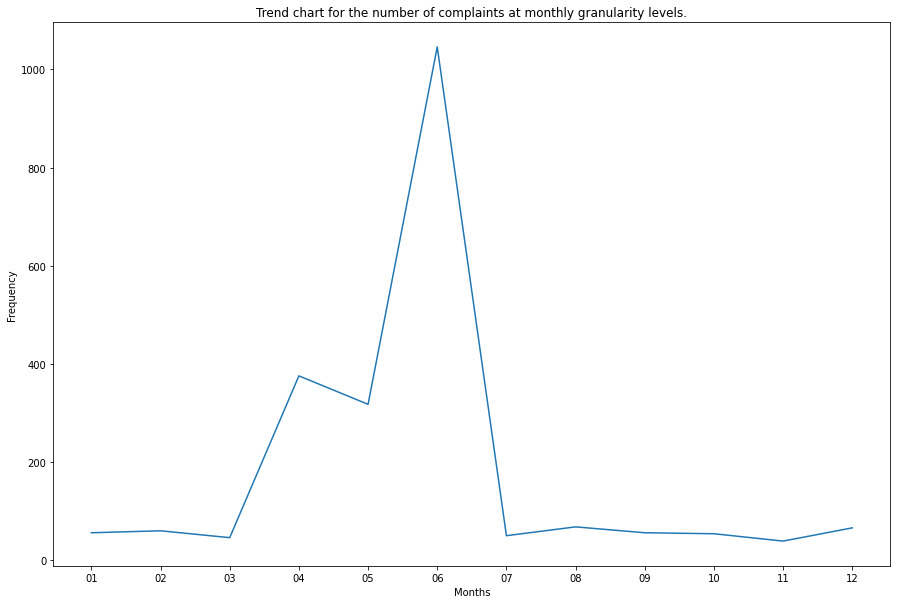

In [23]:
plt.rcParams["figure.figsize"] = [15,10] # increase size
plt.title("Trend chart for the number of complaints at monthly granularity levels.")
plt.xlabel("Months")
plt.ylabel("Frequency")
plt.plot(months, month_freq)

## Provide a table with the frequency of complaint types.

In [12]:
# Check column names
complaints_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [24]:
# calculate frequency of complaint type 
complaints = complaints_data.groupby('Customer Complaint')

In [25]:
# Table with Complaints and frequency
complaints_freq = complaints.size()
complaints_freq

Customer Complaint
(Comcast is not my complaint!) Cyber Tele-marketing is my complaint!                                                                         1
10 Days No Service - 12 Appointments Comcast Hasn't Shown Up - Comcast Has Not Fixed Home Infinity X1 - In 10 Days- Cannot Make 911 Calls    1
2 months and Comcast has not fixed problem                                                                                                   1
2+ Day Degraded Services                                                                                                                     1
300 GB monthly allowance                                                                                                                     1
                                                                                                                                            ..
why am I paying for this ?                                                                                                 

## Which complaint types are maximum

In [26]:
# table with Complain type and its frequency
descending_num_complaints = complaints_freq.sort_values(ascending = False)
descending_num_complaints

Customer Complaint
Comcast                                                                 83
Comcast Internet                                                        18
Comcast Data Cap                                                        17
comcast                                                                 13
Comcast Data Caps                                                       11
                                                                        ..
Lack of availability                                                     1
Lack of communication and poor customer service                          1
Lack of consistent service                                               1
Lack of internet speed                                                   1
(Comcast is not my complaint!) Cyber Tele-marketing is my complaint!     1
Length: 1841, dtype: int64

In [27]:
max_index = descending_num_complaints.index[0]
max_value = descending_num_complaints.values[0]
print("The Customer Complaint: [{}] has maximum number of complaints: {} ".format(max_index, max_value))

The Customer Complaint: [Comcast] has maximum number of complaints: 83 


## Create a new categorical variable with value as Open and Closed.

In [29]:
# Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
complaints_data.groupby('Status').size()

Status
Closed     734
Open       363
Pending    154
Solved     973
dtype: int64

In [14]:
# creating a function to return the new status
def getStatus(s):
    if(np.logical_or(s=='Open', s=='Pending')):
        return "Open"
    else:
        return "Closed"

In [15]:
# creating a new column - New_Status - to hold new status value as required
complaints_data['New_Status'] = complaints_data['Status'].apply(getStatus)
complaints_data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,New_Status
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Closed
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Closed
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Open
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,Closed


## Provide state wise status of complaints in a stacked bar chart.

In [85]:
# Use the categorized variable from earlier
state_status_complaints = pd.crosstab(complaints_data['State'], 
                                      complaints_data['New_Status'])
state_status_complaints

New_Status,Closed,Open
State,,
Alabama,17,9
Arizona,14,6
Arkansas,6,0
California,159,61
Colorado,58,22
Connecticut,9,3
Delaware,8,4
District Of Columbia,14,2
District of Columbia,1,0


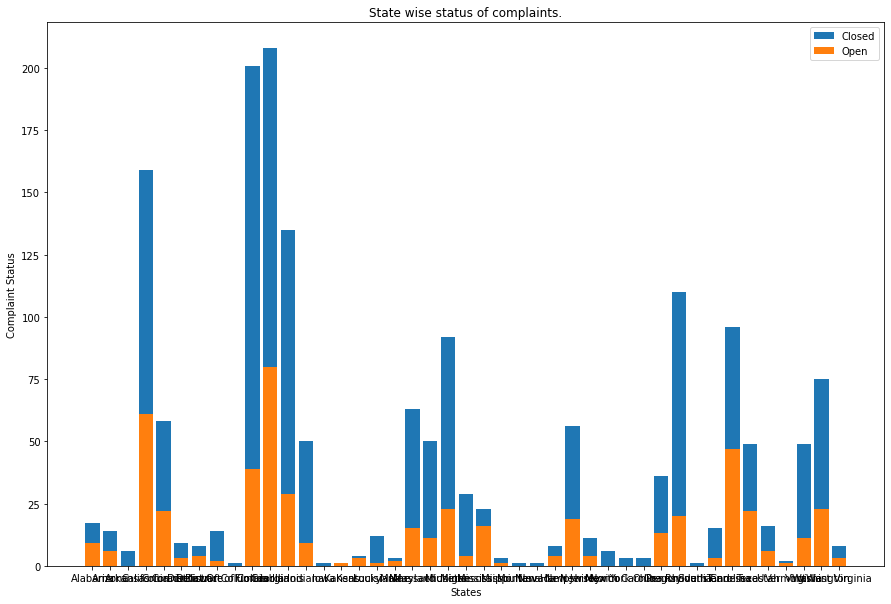

In [86]:
labels = state_status_complaints.index
status_closed = state_status_complaints.values.T[0]
status_open = state_status_complaints.values.T[1]

plt.rcParams["figure.figsize"] = [15,10] # increase size
fig, ax = plt.subplots()

ax.bar(labels, status_closed, label='Closed')
ax.bar(labels, status_open, label='Open')

ax.set_title("State wise status of complaints.")
ax.set_xlabel("States")
ax.set_ylabel("Complaint Status")
ax.legend()

plt.show()

## Which state has the maximum complaints

In [110]:
# Generating a new column to find the total complaints and sorting to find the state with max complaints
state_status_complaints['Total'] = state_status_complaints['Closed'] + state_status_complaints['Open']
sorted_state_status = state_status_complaints.sort_values(by=['Total'], ascending=False)
print("The state {} has maximum complaints: {}".format(sorted_state_status.index[0], sorted_state_status['Total'][0]))
print(sorted_state_status.head(1))


The state Georgia has maximum complaints: 288 ::
New_Status  Closed  Open  Total
State                          
Georgia        208    80    288


## Which state has the highest percentage of unresolved complaints

In [116]:
state_status_complaints['Unresolved_complaint'] = (state_status_complaints['Open']/state_status_complaints['Total'])*100
sorted_percentage = state_status_complaints.sort_values(by=['Unresolved_complaint'], ascending=False)
print("The state {} has highest percentage of unresolved complaints : {}%".format(sorted_percentage.index[0], sorted_percentage['Unresolved_complaint'][0]))
print(sorted_percentage.head(1))                               


The state Kansas has highest percentage of unresolved complaints : 50.0
New_Status  Closed  Open  Total  Unresolved_complaint
State                                                
Kansas           1     1      2                  50.0


In [117]:
sorted_percentage

New_Status,Closed,Open,Total,Unresolved_complaint
State,,,,
Kansas,1,1,2,50.000000
Kentucky,4,3,7,42.857143
Mississippi,23,16,39,41.025641
Maine,3,2,5,40.000000
Alabama,17,9,26,34.615385
Vermont,2,1,3,33.333333
Delaware,8,4,12,33.333333
New Hampshire,8,4,12,33.333333
Tennessee,96,47,143,32.867133


## Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [20]:
complaints_data.groupby('Received Via').size()
pd.crosstab(complaints_data['Received Via'], complaints_data['New_Status'],
            margins = True,
           normalize="index")

New_Status,Closed,Open
Received Via,,
Customer Care Call,0.772118,0.227882
Internet,0.762896,0.237104
All,0.767536,0.232464


In [ ]:
unique